In [0]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm

To get the statsmodels to work had to do the following

! pip install --upgrade Cython

! pip install --upgrade git+https://github.com/statsmodels/statsmodels

In [0]:
#read the dataset into a pandas dataframe 
data = pd.read_csv("Advertising.csv")

In [0]:
#view the head
data.head(3)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3


In [0]:
#get the column names from the dataframe created from the dataset
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [0]:
#delete the first column
data=data.drop(['Unnamed: 0'], axis=1)

In [0]:
#view the shape of the dataset  'ndim' can be used to get the number of dimension in the dataset
data.shape

(200, 4)

In [0]:
data['sales'].describe()

count    200.000000
mean      14.022500
std        5.217457
min        1.600000
25%       10.375000
50%       12.900000
75%       17.400000
max       27.000000
Name: sales, dtype: float64

## Simple linear regression 

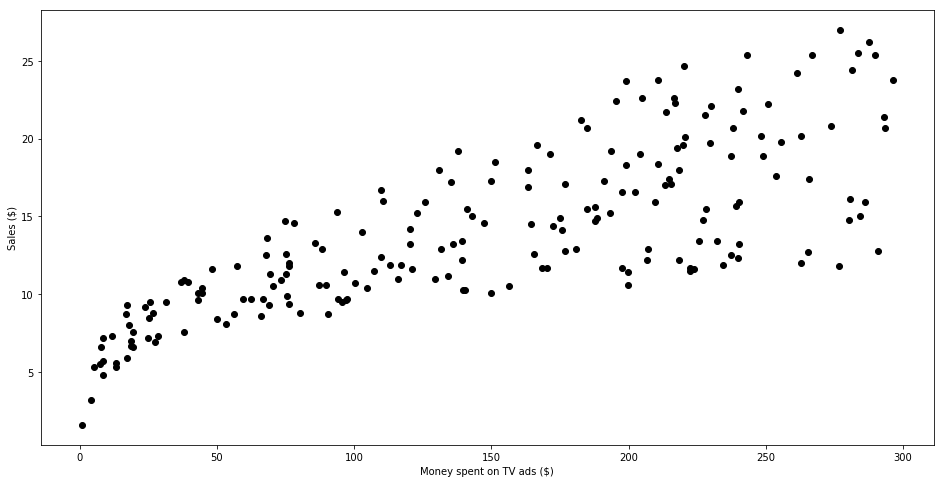

In [0]:
#plot the current dataset
plt.figure(figsize=(16, 8))
plt.scatter(
    data['TV'],
    data['sales'],
    c='black'
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [0]:
#reshape the data for the linear regression fit
X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)

In [0]:
#split the data set into training and testing set the test size id 30% of the whole data and the data should be splitted randomly
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=31)

In [0]:
#plot the training split
plt.figure(figsize=(16, 8))
plt.scatter(
    X_train,
    y_train,
    c='black'
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [0]:
#create an object of Linear regression and fit a model
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print(reg.coef_[0][0])
print(reg.intercept_[0])

print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

0.04875084143240082
6.789765097543871
The linear model is: Y = 6.7898 + 0.048751X


In [0]:
#get the values fit for each of the training point
predictions = reg.predict(X_train)

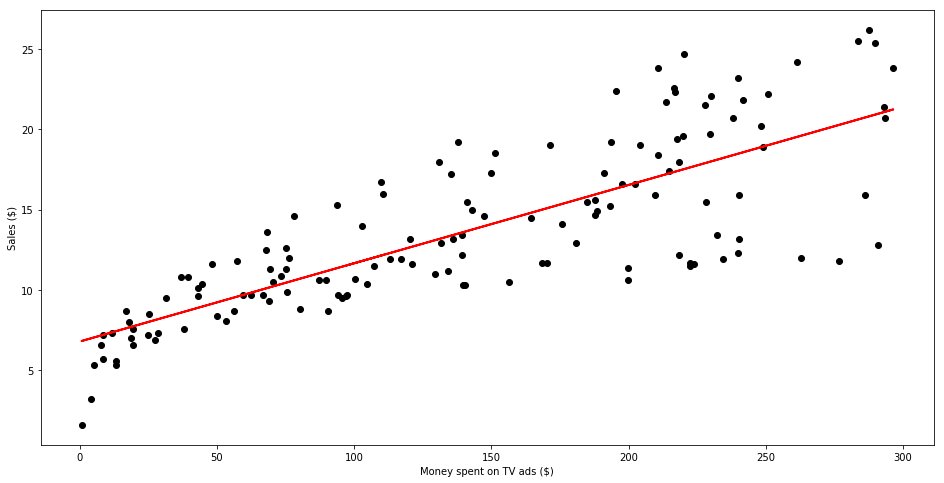

In [0]:
#plot the training set and plot the fits

plt.figure(figsize=(16, 8))
plt.scatter(
    X_train,
    y_train,
    c='black'
)
plt.plot(
    X_train,
    predictions,
    c='red',
    linewidth=2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [0]:
#print training error and test error
print("Mean square error on the training set = ", str(mean_squared_error(y_train, predictions)))
print("Mean square error on the test set = ", str(mean_squared_error(y_test, reg.predict(X_test))))
#train_score=lr.score(X_train, y_train)
#test_score=lr.score(X_test, y_test)

Mean square error on the training set =  10.00460479254584
Mean square error on the test set =  11.74791738243432


In [0]:
#use statistics summary on the training set and print summary
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     233.6
Date:                Sun, 09 Jun 2019   Prob (F-statistic):           1.75e-31
Time:                        18:45:19   Log-Likelihood:                -359.86
No. Observations:                 140   AIC:                             723.7
Df Residuals:                     138   BIC:                             729.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7898      0.522     13.011      0.0

#Regularization to prevent overfitting  (used both Lasso and Ridge)

In [0]:
#Ridge regression
from sklearn.linear_model import RidgeCV
ridgeRegCv = RidgeCV(alphas=[0.01,0.02,0.03,1.0,10.0,15.0,20.0,25.0,30.0,35.0,100,9295]) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
ridgeRegCv.fit(X_train, y_train)
#get the best alpha
ridgeRegCv.alpha_


# we could use, but we want to pick best alpha from sklearn.linear_model import Ridge
#rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
#rr.fit(X_train, y_train)


9295.0

In [0]:
#print the coefficients of the ridge ression
print(ridgeRegCv.coef_[0][0])
print(ridgeRegCv.intercept_[0])
print("The linear model is: Y = {:.5} + {:.5}X".format(ridgeRegCv.intercept_[0], ridgeRegCv.coef_[0][0]))

0.04830087335124939
6.852834230826916
The linear model is: Y = 6.8528 + 0.048301X


In [0]:
#get the values fit for each of the training point
ridgePredictn = ridgeRegCv.predict(X_train)

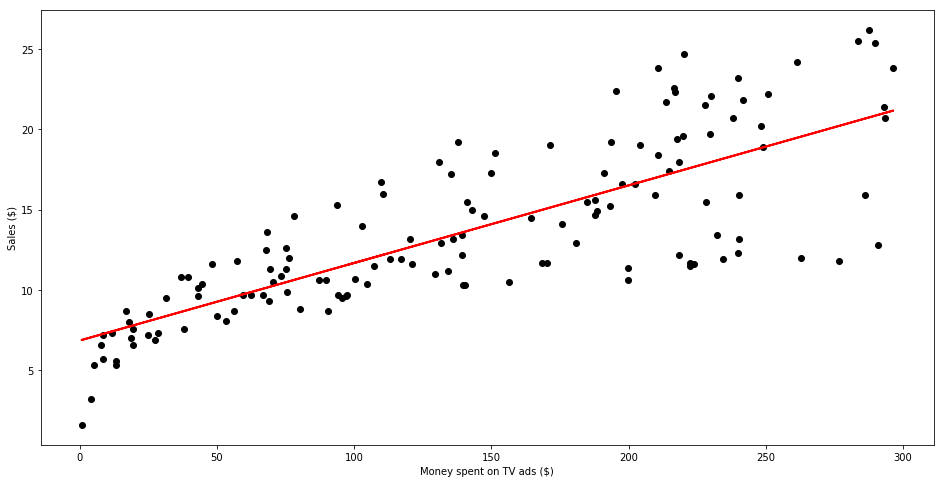

In [0]:
#plot the training set and plot the fits

plt.figure(figsize=(16, 8))
plt.scatter(
    X_train,
    y_train,
    c='black'
)
plt.plot(
    X_train,
    ridgePredictn,
    c='red',
    linewidth=2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [0]:
#print training error and test error
print("Mean square error on the training set using ridge regression = ", str(mean_squared_error(y_train, ridgePredictn)))
print("Mean square error on the test set using  ridge regression = ", str(mean_squared_error(y_test, ridgeRegCv.predict(X_test))))
#train_score=lr.score(X_train, y_train)
#test_score=lr.score(X_test, y_test)

Mean square error on the training set using ridge regression =  10.006047765030342
Mean square error on the test set using  ridge regression =  11.724145523230723


In [0]:
#Lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.06)
lasso.fit(X_train,y_train)
#train_score=lasso.score(X_train,y_train)
#test_score=lasso.score(X_test,y_test)
#coeff_used = np.sum(lasso.coef_!=0)

Lasso(alpha=0.06, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
#print the coefficients of the lasso ression
print(lasso.coef_[0])
print(lasso.intercept_[0])
print("The linear model is: Y = {:.5} + {:.5}X".format(lasso.intercept_[0], lassoRegCv.coef_[0]))

0.04874242250787263
6.790945124073329
The linear model is: Y = 6.7909 + 0.048749X


In [0]:
#get the values fit for each of the training point
lassoPredictn = lasso.predict(X_train)
#print training error and test error
print("Mean square error on the training set using lasso regression = ", str(mean_squared_error(y_train, lassoPredictn)))
print("Mean square error on the test set using  lasso regression = ", str(mean_squared_error(y_test, lasso.predict(X_test))))

Mean square error on the training set using lasso regression =  10.00460529768131
Mean square error on the test set using  lasso regression =  11.747442961873405


# Multiple ordinary linear regression 

In [0]:
Xs = data.drop(['sales', 'Unnamed: 0'], axis=1)
y = data['sales'].values.reshape(-1,1)

In [0]:
#split the data set into training and testing set the test size id 30% of the whole data and the data should be splitted randomly
X_train,X_test,y_train,y_test=train_test_split(Xs,y, test_size=0.3, random_state=31)

In [0]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print(reg.coef_)
print(reg.intercept_)

[[0.04641035 0.1776423  0.00169583]]
[3.0421146]


In [0]:
print("The linear model is: Y = {:.5} + {:.5}*TV + {:.5}*radio + {:.5}*newspaper".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2]))

The linear model is: Y = 3.0421 + 0.04641*TV + 0.17764*radio + 0.0016958*newspaper


In [0]:
#print training error and test error
print("Mean square error on the training set = ", str(mean_squared_error(y_train, reg.predict(X_train))))
print("Mean square error on the test set = ", str(mean_squared_error(y_test, reg.predict(X_test))))


Mean square error on the training set =  3.0353785403255316
Mean square error on the test set =  2.2845483088592804


In [0]:
reg.score(Xs, y)

0.8972106381789521

In [0]:
X = np.column_stack((X_train['TV'], X_train['radio'], X_train['newspaper']))
y = y_train

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     357.1
Date:                Sun, 09 Jun 2019   Prob (F-statistic):           2.93e-64
Time:                        19:38:09   Log-Likelihood:                -276.37
No. Observations:                 140   AIC:                             560.7
Df Residuals:                     136   BIC:                             572.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0421      0.374      8.134      0.0

ridge and lasso also follows from the process described above

I acknowledge and recommend the following writeups for a good understanding of the ideas :

https://towardsdatascience.com/linear-regression-python-implementation-ae0d95348ac4

https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b